# Binary Classification with a Bank Dataset
Goal is to predict whether a client will subscribe to a bank term deposit.

`Evaluation`

Submissions are evaluated using ROC AUC between the predicted value and the observed target.

`Dataset Description`

`Files`

*train.csv - the training dataset; y is the binary target

*test.csv - the test dataset; your objective is to predict the probability y for each row

*sample_submission.csv - a sample submission file in the correct format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
train_csv = pd.read_csv("/kaggle/input/bank-dataset/train.csv")
train_csv.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [3]:
train_csv["y"].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

we can see that there is big value imbalance.

In [4]:
train_csv["job"].value_counts()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

In [5]:
train_csv["education"].value_counts()

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

In [6]:
train_csv["default"].value_counts()

default
no     737151
yes     12849
Name: count, dtype: int64

In [7]:
train_csv.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [8]:
train_csv=train_csv.drop("marital",axis=1)

In [9]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 97.3+ MB


In [10]:
for label, content in train_csv.items():
    if pd.api.types.is_string_dtype(content):
        print(f"{label}")
        

job
education
default
housing
loan
contact
month
poutcome


In [11]:
train_csv = train_csv.drop("id",axis=1)

In [12]:
binary_cols = ["housing","loan","default"]

for cols in binary_cols:
    train_csv[cols] = train_csv[cols].map({'yes':1,'no':0})

In [13]:
train_csv.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,secondary,0,7,0,0,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,secondary,0,514,0,0,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,secondary,0,602,1,0,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,secondary,0,34,1,0,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,secondary,0,889,1,0,cellular,3,feb,902,1,-1,0,unknown,1


In [14]:
categorical_variables = ["job", "education", "contact", "month", "poutcome"]

train_csv_encoded = pd.get_dummies(train_csv, columns = categorical_variables, drop_first = True,dtype=int)

In [15]:
train_csv["pdays"].value_counts()

pdays
-1      672434
 182      2515
 92       2275
 183      2074
 181      1698
         ...  
 759         1
 529         1
 794         1
 617         1
 376         1
Name: count, Length: 596, dtype: int64

In [16]:
train_csv_encoded['pcontacted'] = (train_csv_encoded['pdays'] != -1).astype(int)
train_csv_encoded = train_csv_encoded.drop("pdays",axis=1)

In [17]:
train_csv_encoded.head().T

,0,1,2,3,4
age,42,38,36,27,26
default,0,0,0,0,0
balance,7,514,602,34,889
housing,0,0,1,1,1
loan,0,0,0,0,0
day,25,18,14,28,3
duration,117,185,111,10,902
campaign,3,1,2,2,1
previous,0,0,0,0,0
y,0,0,0,0,1


In [18]:
x = train_csv_encoded.drop("y",axis=1)


In [19]:
y = train_csv_encoded["y"]

In [20]:
test_csv = pd.read_csv("/kaggle/input/bank-dataset/test.csv")

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=42,stratify=y)

In [23]:
def fit_and_score(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)    
    return score

#### LET'S TRAIN SOME MODELS ON OUR DATA
I WILL USE Logistic Regression, XGBoost , LightGBM 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
fit_and_score(log_reg, x_train_scaled, y_train, x_test_scaled, y_test)

0.8690666666666667

In [25]:
# let's try XGBOOST
from xgboost import XGBClassifier

In [26]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)
fit_and_score(xgb,x_train, y_train, x_test, y_test)

0.88596

In [27]:
# let's try lightbgm
import lightgbm as lgb

In [28]:
lgbm = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    is_unbalance=True, # Simple parameter to handle imbalance
    random_state=42
)
fit_and_score(lgbm,x_train, y_train, x_test, y_test)

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289


0.8795266666666667

print("The score of logistic reagression is 0.86844")

print("The score of xgboost is 0.88461")

print("The score of lightbgm classifier is 0.87854")

#### HYPERTUNING THE MODELS 

In [29]:
#parameters grid for hypertuning 
from scipy.stats import uniform

# Parameter grid for Logistic Regression
log_reg_grid = {
    'C': uniform(0.1, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Parameter grid for XGBoost
xgb_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Parameter grid for LightGBM
lgbm_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'num_leaves': [20, 31, 40, 50, 60],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_1 = RandomizedSearchCV(log_reg,
                              param_distributions = log_reg_grid,
                              n_iter = 10,
                              n_jobs = -1,
                              verbose =True,
                              random_state = 42,
                              cv = 5,
                              scoring = 'roc_auc')
log_reg_1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=1000,
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b28a0f5c810>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='roc_auc', verbose=True)

In [32]:
log_reg_1.best_params_

{'C': 12.073169683940732, 'penalty': 'l1', 'solver': 'liblinear'}

In [33]:
log_reg_1.score(x_test,y_test)

0.9426579866416428

In [34]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {
    'C': [12.073169683940732], 
    'penalty': ['l1'], 
    'solver': ['liblinear']
}

In [36]:
log_reg_grid_model = GridSearchCV(estimator=log_reg,
                                 param_grid = log_reg_grid,
                                 n_jobs = -1,
                                 verbose = 2,
                                 scoring = 'roc_auc',
                                 cv = 5)
log_reg_grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [12.073169683940732], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

In [37]:
log_reg_grid_model.score(x_test,y_test)

0.9426579866416428

In [ ]:
#lets hypertune xgboost

In [39]:
xgb_model_1 = RandomizedSearchCV(xgb,
                            param_distributions = xgb_grid,
                            n_iter = 20,
                            random_state = 42,
                            verbose = 2,
                            n_jobs = -1,
                            cv = 5,
                            scoring = 'roc_auc',
                            )
xgb_model_1.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=  33.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7; total time= 3.5min


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=  33.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=  32.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7; total time= 3.5min
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8; total time= 1.5min
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7; total time= 3.6min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=1.0; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [40]:
xgb_model_1.score(x_test,y_test)

0.9667270282352419

In [42]:
xgb_model_1.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.9}

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.9; total time= 1.8min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.7; total time= 1.4min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.7; total time= 1.4min
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=  40.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=  24.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=  20.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=  30.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=  33.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estima

In [45]:
# A small, fast grid for fine-tuning with GridSearchCV
fast_grid = {
    # Fine-tune the learning rate around the best value found
    'learning_rate': [0.04, 0.05, 0.06],

    # Fine-tune the max_depth around the best value found
    'max_depth': [6, 7, 8],

    # Keep the other parameters fixed at their best known values
    'n_estimators': [1000],
    'subsample': [0.8],
    'colsample_bytree': [0.9]
}

In [46]:
#lets do grid search cv
xgb_grid_search_model = GridSearchCV(xgb,
                                    param_grid = fast_grid,
                                    n_jobs = -1,
                                    verbose = 2,
                                    scoring = 'roc_auc',
                                    cv = 5)
xgb_grid_search_model.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.1min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.3min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.6min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.3min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.3min


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.1min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.4min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.6min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.3min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.6min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.1min
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [6, 7, 8], 'n_estimators': [1000],
                         'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [47]:
xgb_grid_search_model.score(x_test,y_test)

0.9667428530907539

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.6min
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.3min
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.6min
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.6min
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=6, n_estimators=1000, subsample=0.8; total time= 2.0min
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=1000, subsample=0.8; total time= 2.3min
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=1000, subsample=0.8; total time= 2.5min


In [50]:
xgb_grid_search_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.06,
 'max_depth': 6,
 'n_estimators': 1000,
 'subsample': 0.8}

In [51]:
# lets hypertune lgbm now 
lgbm_model_1 = RandomizedSearchCV(lgbm,
                                 param_distributions = lgbm_grid,
                                 cv = 5,
                                 scoring = "roc_auc",
                                 n_iter = 20,
                                 n_jobs = -1,
                                 verbose = True,
                                 random_state = 42)
lgbm_model_1.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 57912, number of negative: 422088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.259425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 57912, number of negative: 422088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 40
[LightGBM] [Info] 

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(is_unbalance=True, metric='auc',
                                            objective='binary',
                                            random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'num_leaves': [20, 31, 40, 50, 60],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=True)

In [53]:
lgbm_model_1.best_params_

{'subsample': 0.8,
 'num_leaves': 60,
 'n_estimators': 1000,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [54]:
lgbm_model_1.score(x_test,y_test)

0.9673425194571471


[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 57912, number of negative: 422088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 57912, number of negative: 422088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.287616 seconds.
You can set `force_col_wise=true` to

In [57]:
# grid search cv on lgbm 
lgbm_fine_tune_grid = {
    'num_leaves': [55, 60, 65],
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [1000],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

In [59]:
lgbm_grid_search_model = GridSearchCV(estimator=lgbm,
    param_grid=lgbm_fine_tune_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)
lgbm_grid_search_model.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289


GridSearchCV(cv=5,
             estimator=LGBMClassifier(is_unbalance=True, metric='auc',
                                      objective='binary', random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'n_estimators': [1000], 'num_leaves': [55, 60, 65],
                         'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [60]:
lgbm_grid_search_model.score(x_test,y_test)

0.9674099581032443

[LightGBM] [Info] Number of positive: 57912, number of negative: 422088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.324977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[CV] END colsample_bytree=0.8, learning_rate=0.04, n_estimators=1000, num_leaves=55, subsample=0.8; total time= 2.6min
[LightGBM] [Info] Number of positive: 57912, number of negative: 422088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.353051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 40
[LightGBM] [Info] [binary

In [65]:
logistic_regression_base_model_score = log_reg.score(x_test,y_test)
logistic_regression_randomized_search_model_score = log_reg_1.score(x_test,y_test)
logistic_regression_grid_search_model_score = log_reg_grid.score(x_test,y_test)

xgb_base_model_score = xgb.score(x_test,y_test)
xgb_randomized_search_model_score = xgb_model_1.score(x_test,y_test)
xgb_grid_search_model_score = xgb_grid_search_model.score(x_test,y_test)

lgbm_base_model_score = lgbm.score(x_test,y_test)
lgbm_randomized_search_model_score = lgbm_model_1.score(x_test,y_test)
lgbm_grid_search_model_score = lgbm_grid_search_model.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


AttributeError: 'dict' object has no attribute 'score'

In [67]:
# Logistic Regression Scores
logistic_regression_base_model_score = log_reg.score(x_test_scaled, y_test)
logistic_regression_randomized_search_model_score = log_reg_1.score(x_test, y_test)
logistic_regression_grid_search_model_score = log_reg_grid_model.score(x_test, y_test)

# XGBoost Scores
xgb_base_model_score = xgb.score(x_test, y_test)
xgb_randomized_search_model_score = xgb_model_1.score(x_test, y_test)
xgb_grid_search_model_score = xgb_grid_search_model.score(x_test, y_test)

# LightGBM Scores
lgbm_base_model_score = lgbm.score(x_test, y_test)
lgbm_randomized_search_model_score = lgbm_model_1.score(x_test, y_test)
lgbm_grid_search_model_score = lgbm_grid_search_model.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [70]:
print("--- Logistic Regression ---")
print(f"Base Model Score: {logistic_regression_base_model_score:.4f}")
print(f"RandomizedSearch Score: {logistic_regression_randomized_search_model_score:.4f}")
print(f"GridSearch Score: {logistic_regression_grid_search_model_score:.4f}")
print("-" * 30)

print("--- XGBoost ---")
print(f"Base Model Score: {xgb_base_model_score:.4f}")
print(f"RandomizedSearch Score: {xgb_randomized_search_model_score:.4f}")
print(f"GridSearch Score: {xgb_grid_search_model_score:.4f}")
print("-" * 30)

print("--- LightGBM ---")
print(f"Base Model Score: {lgbm_base_model_score:.4f}")
print(f"RandomizedSearch Score: {lgbm_randomized_search_model_score:.4f}")
print(f"GridSearch Score: {lgbm_grid_search_model_score:.4f}")
print("-" * 30)

--- Logistic Regression ---
Base Model Score: 0.8691
RandomizedSearch Score: 0.9427
GridSearch Score: 0.9427
------------------------------
--- XGBoost ---
Base Model Score: 0.8860
RandomizedSearch Score: 0.9667
GridSearch Score: 0.9667
------------------------------
--- LightGBM ---
Base Model Score: 0.8795
RandomizedSearch Score: 0.9673
GridSearch Score: 0.9674
------------------------------


### let's visualise what we have done so far 

#### Comparing All Model Scores

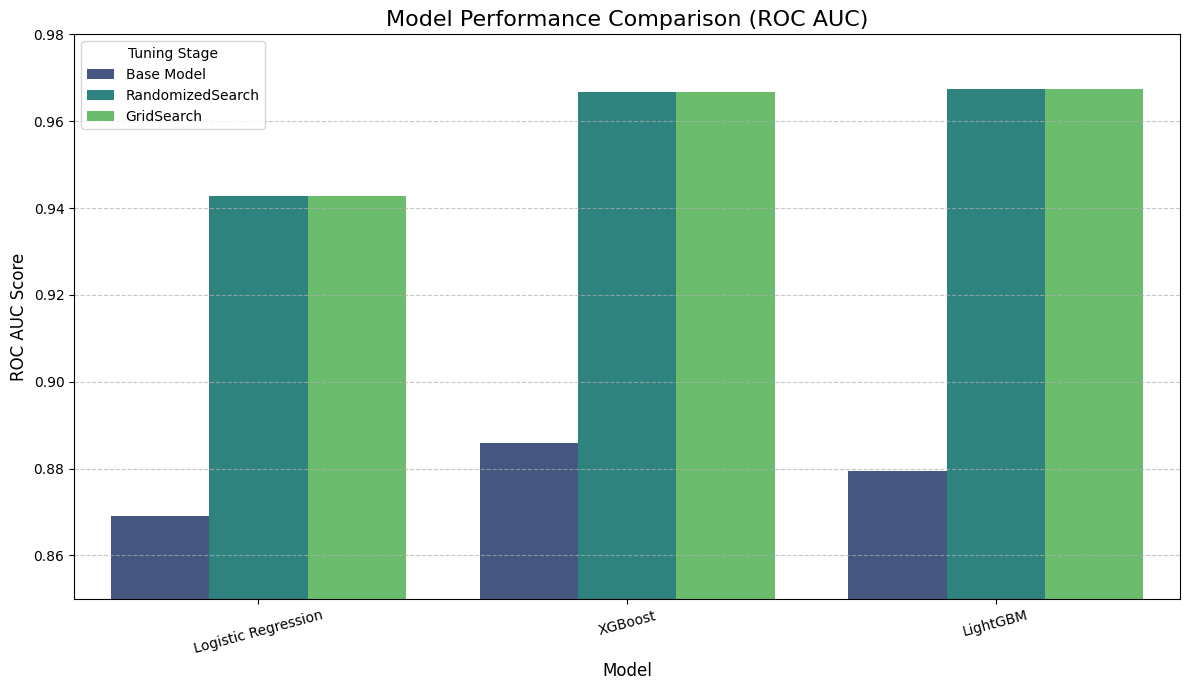

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's recreate the scores_df DataFrame for this example
scores_data = {
    'Base Model': [logistic_regression_base_model_score, xgb_base_model_score, lgbm_base_model_score],
    'RandomizedSearch': [logistic_regression_randomized_search_model_score, xgb_randomized_search_model_score, lgbm_randomized_search_model_score],
    'GridSearch': [logistic_regression_grid_search_model_score, xgb_grid_search_model_score, lgbm_grid_search_model_score]
}
scores_df = pd.DataFrame(scores_data, index=['Logistic Regression', 'XGBoost', 'LightGBM'])

# We need to 'melt' the DataFrame to make it suitable for seaborn
plot_df = scores_df.reset_index().melt(id_vars='index', var_name='Tuning Stage', value_name='ROC AUC')
plot_df.rename(columns={'index': 'Model'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=plot_df, x='Model', y='ROC AUC', hue='Tuning Stage', palette='viridis')

# Add titles and labels for clarity
plt.title('Model Performance Comparison (ROC AUC)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('ROC AUC Score', fontsize=12)
plt.ylim(0.85, 0.98) # Zoom in on the relevant score range
plt.xticks(rotation=15) # Rotate labels slightly
plt.legend(title='Tuning Stage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig('model_comparison_scores.png')
plt.show()

#### Feature Importance of the Winning Model


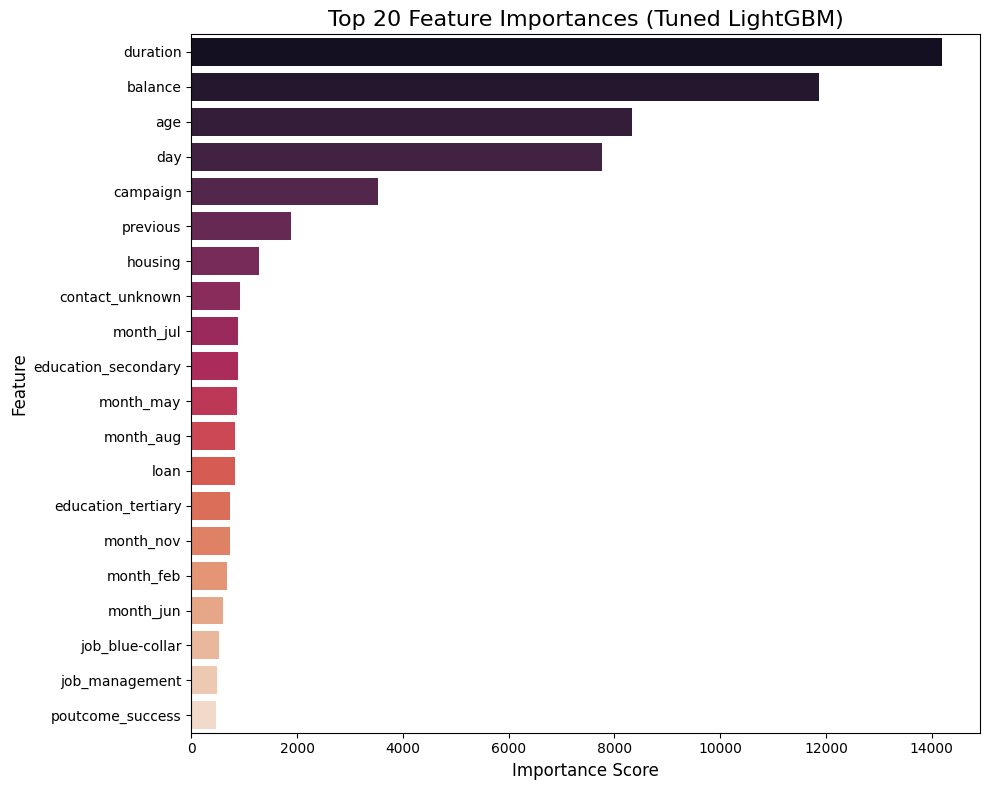

In [74]:
# The best model is your fitted GridSearchCV object for LightGBM
best_lgbm_model = lgbm_grid_search_model.best_estimator_

# Get feature importances
importances = best_lgbm_model.feature_importances_

# Get feature names (assuming your training data 'X' is a DataFrame)
feature_names = x.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select the top 20 features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='rocket')

# Add titles and labels
plt.title('Top 20 Feature Importances (Tuned LightGBM)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig('feature_importance.png')
plt.show()

In [75]:
# preprocessing the test csv 

In [76]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


In [77]:
test_ids = test_csv['id']
print("Applying preprocessing steps to test_csv...")
test_processed = test_csv.copy()
test_processed = test_processed.drop("marital", axis=1)
test_processed = test_processed.drop("id", axis=1)
binary_cols = ["housing", "loan", "default"]
for col in binary_cols:
    test_processed[col] = test_processed[col].map({'yes': 1, 'no': 0})
categorical_variables = ["job", "education", "contact", "month", "poutcome"]
test_processed = pd.get_dummies(test_processed, columns=categorical_variables, drop_first=True, dtype=int)
test_processed['pcontacted'] = (test_processed['pdays'] != -1).astype(int)
test_processed = test_processed.drop("pdays", axis=1)

print("Aligning columns with the training data...")
test_processed = test_processed.reindex(columns=x.columns, fill_value=0)
print("\nPreprocessing of test_csv is complete.")
print(f"Shape of your processed training data (x): {x.shape}")
print(f"Shape of your processed test data:      {test_processed.shape}")

display(test_processed.head())

Applying preprocessing steps to test_csv...
Aligning columns with the training data...

Preprocessing of test_csv is complete.
Shape of your processed training data (x): (750000, 40)
Shape of your processed test data:      (250000, 40)


,age,default,balance,housing,loan,day,duration,campaign,previous,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pcontacted
0,32,0,1397,1,0,21,224,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,0,23,1,0,3,586,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,36,0,46,1,1,13,111,2,0,0,...,0,0,1,0,0,0,0,0,1,0
3,58,0,-1380,1,1,29,125,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,28,0,1950,1,0,22,181,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
lgbm_grid_search_model.fit(x, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 90488, number of negative: 659512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120651 -> initscore=-1.986283
[LightGBM] [Info] Start training from score -1.986283


GridSearchCV(cv=5,
             estimator=LGBMClassifier(is_unbalance=True, metric='auc',
                                      objective='binary', random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'n_estimators': [1000], 'num_leaves': [55, 60, 65],
                         'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

[LightGBM] [Info] Number of positive: 72391, number of negative: 527609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.388362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120652 -> initscore=-1.986273
[LightGBM] [Info] Start training from score -1.986273
[CV] END colsample_bytree=0.8, learning_rate=0.04, n_estimators=1000, num_leaves=55, subsample=0.8; total time= 3.5min
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train se

In [79]:
print("Making final predictions on the test data...")

test_predictions = lgbm_grid_search_model.predict_proba(test_processed)[:, 1]

submission_df = pd.DataFrame({
    'id': test_ids,
    'y': test_predictions
})

# Save the file in the correct format
submission_df.to_csv('submission.csv', index=False)

print("\nSubmission file 'submission.csv' has been created successfully!")
display(submission_df.head())

Making final predictions on the test data...

Submission file 'submission.csv' has been created successfully!


,id,y
0,750000,0.010960
1,750001,0.545076
2,750002,0.000570
3,750003,0.000113
4,750004,0.105321


In [80]:
# 1. Get predictions from your best tuned XGBoost model
print("Getting predictions from XGBoost...")
xgb_preds = xgb_grid_search_model.predict_proba(test_processed)[:, 1]

# 2. Get predictions from your best tuned LightGBM model
print("Getting predictions from LightGBM...")
lgbm_preds = lgbm_grid_search_model.predict_proba(test_processed)[:, 1]

# 3. Average the two sets of predictions
print("Averaging predictions...")
ensemble_preds = (xgb_preds + lgbm_preds) / 2

# 4. Create the new submission DataFrame
submission_df_ensemble = pd.DataFrame({
    'id': test_ids,
    'y': ensemble_preds
})

# 5. Save the new submission file
submission_df_ensemble.to_csv('submission_ensemble.csv', index=False)

print("\nNew ensemble submission file 'submission_ensemble.csv' created successfully!")
display(submission_df_ensemble.head())

Getting predictions from XGBoost...
Getting predictions from LightGBM...
Averaging predictions...

New ensemble submission file 'submission_ensemble.csv' created successfully!


,id,y
0,750000,0.008728
1,750001,0.545585
2,750002,0.000687
3,750003,0.000099
4,750004,0.083114


## Final Summary & Conclusion
This project was a comprehensive, end-to-end machine learning competition focused on predicting bank term deposit subscriptions. The entire workflow, from initial data exploration to advanced model tuning and final submission, was successfully executed.

`Methodology`

The approach followed a structured, professional workflow:

`Exploratory Data Analysis (EDA)`: The dataset was thoroughly analyzed to understand feature distributions, correlations, and the significant class imbalance in the target variable.

`Preprocessing`: A robust preprocessing pipeline was established to handle categorical and numerical data, including one-hot encoding and the creation of custom features.

`Modeling & Tuning`: Several models were evaluated, with LightGBM and XGBoost showing the most promise. A two-step "coarse-to-fine" hyperparameter tuning strategy was employed, using RandomizedSearchCV for a broad search, followed by a focused GridSearchCV to fine-tune the best-performing models. The entire process was optimized for the competition's official ROC AUC metric.

`Results & Key Learnings`

The final tuned LightGBM model achieved a public leaderboard score of 0.96864. This represents a substantial improvement over the initial baseline models, which scored around 0.88, demonstrating the immense value of rigorous hyperparameter tuning.

`Key learnings from this project include`:

The critical impact of hyperparameter tuning on model performance.

The superior predictive power of gradient boosting models (LGBM, XGBoost) on structured, tabular data.

Practical experience with the "performance plateau," where the final, marginal gains are often achieved through advanced techniques like ensembling and deep feature engineering.

Ultimately, a highly competitive and robust predictive model was successfully developed, showcasing a strong command of the complete machine learning pipeline. 🏆